# Name : Prince Verma
# GitHub UserName: vermaprince17
# USC-ID : 7468967920
# USC Net ID: princeve

**1. Multi-class and Multi-Label Classification Using Support Vector Machines**

1. (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set

In [1]:
import math
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold

from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import hamming_loss,accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
INPUT_FILE_PATH = "../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv"
frogs_data = pd.read_csv(INPUT_FILE_PATH)
frogs_data

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [3]:
frogs_data_X = frogs_data.iloc[:, :-4]
frogs_data_Y = frogs_data.iloc[:, -4:-1]

frogs_data_X_train, frogs_data_X_test, frogs_data_Y_train, frogs_data_Y_test = train_test_split(frogs_data_X,
                                                                                                frogs_data_Y,
                                                                                                test_size= 0.3
                                                                                               )

**1. (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach.**

**1. (b) (i). Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem**

Exact Match Score: In multilabel classification, Exact Match Score defines the subset accuracy, i.e. the number of observations for which the actual set of labels correspond to the predicted set of labels for that obervation. In other words, if the entire set of predicted labels for a sample strictly match the actual set of labels, then the subset accuracy will be 1.0, otherwise it is 0.0.


Hamming Loss: Hamming Loss computes the average hamming distance between two set of samples. It is the fraction of observations for which labels are not predicted properly. In other words, if an observation has 3 labels, and 2 out of these 3 labels are not predicted correctly, then the hamming distance is 2.

**1. (b) (ii). Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.**

In [4]:
#classifier for FAMILY
C = np.logspace(-3,6,10)
gamma = np.linspace(0.1,2.0,10)

param_grid = {"gamma": gamma, "C": C}
cv = RepeatedKFold(n_splits= 10, n_repeats= 2)
svc = SVC(kernel= 'rbf', decision_function_shape= 'ovr')

g = GridSearchCV(estimator= svc, cv= cv, param_grid = param_grid)
g = g.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, :1].values.ravel())

best_score_family = g.best_score_
best_param_family = g.best_params_
best_est_family = g.best_estimator_

print('The best parameters for FAMILY label are: ', best_param_family)
print('The best score is: ', best_score_family)

y_pred_test_family = best_est_family.predict(frogs_data_X_test)

The best parameters for FAMILY label are:  {'C': 100.0, 'gamma': 1.577777777777778}
The best score is:  0.9922540155890058


In [5]:
#classifier for GENUS
C = np.logspace(-3,6,10)
gamma = np.linspace(0.1,2.0,10)

param_grid = {"gamma": gamma, "C": C}
cv = RepeatedKFold(n_splits= 10, n_repeats= 2)
svc = SVC(kernel= 'rbf', decision_function_shape= 'ovr')

g = GridSearchCV(estimator= svc, cv= cv, param_grid = param_grid)
g = g.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, 1:2].values.ravel())

best_score_genus = g.best_score_
best_param_genus = g.best_params_
best_est_genus = g.best_estimator_

print('The best parameters for GENUS label are: ', best_param_genus)
print('The best score is: ', best_score_genus)

y_pred_test_genus = best_est_genus.predict(frogs_data_X_test)

The best parameters for GENUS label are:  {'C': 100.0, 'gamma': 2.0}
The best score is:  0.989974439079807


In [6]:
#classifier for SPECIES
C = np.logspace(-3,6,10)
gamma = np.linspace(0.1,2.0,10)

param_grid = {"gamma": gamma, "C": C}
cv = RepeatedKFold(n_splits= 10, n_repeats= 2)
svc = SVC(kernel= 'rbf', decision_function_shape= 'ovr')

g = GridSearchCV(estimator= svc, cv= cv, param_grid = param_grid)
g = g.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, 2:3].values.ravel())

best_score_species = g.best_score_
best_param_species = g.best_params_
best_est_species = g.best_estimator_

print('The best parameters for SPECIES label are: ', best_param_species)
print('The best score is: ', best_score_species)

y_pred_test_species = best_est_species.predict(frogs_data_X_test)

The best parameters for SPECIES label are:  {'C': 100.0, 'gamma': 1.577777777777778}
The best score is:  0.9893782148379564


In [7]:
y_pred_total = pd.DataFrame()
y_pred_total['Family'] = y_pred_test_family
y_pred_total['Genus'] = y_pred_test_genus
y_pred_total['Species'] = y_pred_test_species

y_pred_total

Family      Genus                 Species
0             Hylidae  Hypsiboas       HypsiboasCordobae
1     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
4             Hylidae  Hypsiboas    HypsiboasCinerascens
...               ...        ...                     ...
2154  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2155          Hylidae  Hypsiboas    HypsiboasCinerascens
2156  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2157          Hylidae     Scinax             ScinaxRuber
2158          Hylidae  Hypsiboas       HypsiboasCordobae

[2159 rows x 3 columns]

In [8]:
def hamming_loss_fn(y_true, y_pred):
    incorrect_pred = 0
    N = len(y_true)
    L = len(y_true.columns)

    for col in y_true.columns:
        for row in range(len(y_true)):
            if y_pred.iloc[row][col] != y_true.iloc[row][col]:
                incorrect_pred += 1

    h_score = incorrect_pred / (N*L)
    
    return h_score

In [9]:
def exact_match(y_true, y_pred):
    em_val = np.all(y_true.reset_index(drop=True) == y_pred.reset_index(drop=True), axis= 1).mean()
    return em_val

In [10]:
h_loss = hamming_loss_fn(frogs_data_Y_test, y_pred_total)
print("*******************")
print("Hamming Loss for SVM classifer: ", h_loss)
print("*******************")

em_val = exact_match(frogs_data_Y_test, y_pred_total)
print("Exact match score for SVM classifier: ", em_val)

*******************
Hamming Loss for SVM classifer:  0.007565230816736143
*******************
Exact match score for SVM classifier:  0.9893469198703103


**1. (b) (iii). Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation**

In [11]:
std_scalar = StandardScaler()
l1_svc = LinearSVC(penalty= 'l1',dual= False, max_iter= 10000)

cv_l1_svc = RepeatedKFold(n_splits= 10, n_repeats= 2)

c_lin_svc = np.logspace(-3,6,10)
param_grid = {'linearsvc__C' : c_lin_svc}

pipeline_l1_svc = make_pipeline(std_scalar, l1_svc)

In [12]:
# L1 classifier for FAMILY
g_l1_family = GridSearchCV(estimator= pipeline_l1_svc, param_grid= param_grid, cv= cv_l1_svc, n_jobs=-1)
g_l1_family = g_l1_family.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, :1].values.ravel())

best_param_l1_family = g_l1_family.best_params_
best_score_l1_family = g_l1_family.best_score_
best_est_l1_family = g_l1_family.best_estimator_

print("The best parameters for FAMILY: ", best_param_l1_family)
print("The best score is: ", best_score_l1_family)

y_pred_test_l1_family = best_est_l1_family.predict(frogs_data_X_test)

The best parameters for FAMILY:  {'linearsvc__C': 1.0}
The best score is:  0.931986848748777


In [13]:
# L1 classifier for GENUS
g_l1_family = GridSearchCV(estimator= pipeline_l1_svc, param_grid= param_grid, cv= cv_l1_svc, n_jobs=-1)
g_l1_family = g_l1_family.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, 1:2].values.ravel())

best_param_l1_genus = g_l1_family.best_params_
best_score_l1_genus = g_l1_family.best_score_
best_est_l1_genus = g_l1_family.best_estimator_

print("The best parameters for GENUS: ", best_param_l1_genus)
print("The best score is: ", best_score_l1_genus)

y_pred_test_l1_genus = best_est_l1_genus.predict(frogs_data_X_test)

The best parameters for GENUS:  {'linearsvc__C': 100.0}
The best score is:  0.9516476537599798


In [14]:
# L1 classifier for SPECIES
g_l1_family = GridSearchCV(estimator= pipeline_l1_svc, param_grid= param_grid, cv= cv_l1_svc, n_jobs=-1)
g_l1_family = g_l1_family.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, 2:3].values.ravel())

best_param_l1_species = g_l1_family.best_params_
best_score_l1_species = g_l1_family.best_score_
best_est_l1_species = g_l1_family.best_estimator_

print("The best parameters for SPECIES: ", best_param_l1_species)
print("The best score is: ", best_score_l1_species)

y_pred_test_l1_species = best_est_l1_species.predict(frogs_data_X_test)

The best parameters for SPECIES:  {'linearsvc__C': 10.0}
The best score is:  0.9556216273785856


In [15]:
y_pred_total_l1 = pd.DataFrame()
y_pred_total_l1['Family'] = y_pred_test_l1_family
y_pred_total_l1['Genus'] = y_pred_test_l1_genus
y_pred_total_l1['Species'] = y_pred_test_l1_species

In [16]:
h_loss = hamming_loss_fn(frogs_data_Y_test, y_pred_total_l1)
print("*******************")
print("Hamming Loss for L1 SVC classifer: ", h_loss)
print("*******************")

em_val = exact_match(frogs_data_Y_test, y_pred_total_l1)
print("Exact match score for L1 SVC classifier: ", em_val)

*******************
Hamming Loss for L1 SVC classifer:  0.051103906129380886
*******************
Exact match score for L1 SVC classifier:  0.9166280685502547


**1. (b) (iv). Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained**

In [17]:
std_scalar = StandardScaler()
smote_l1 = SMOTE()

l1_svc_smote = LinearSVC(penalty= 'l1',dual= False, max_iter= 10000)
cv_l1_svc_smote = RepeatedKFold(n_splits= 10, n_repeats= 2)

c_linear_smote_svc = np.logspace(-3,6,10)
param_grid = {'svc_classifer__C' : c_linear_smote_svc}

pipeline_l1_svc_smote = Pipeline(steps = [['std_scalar' , std_scalar],
                                          ['smote', smote_l1],
                                          ['svc_classifer' , l1_svc_smote]]
                                )

In [18]:
# SMOTE L1 classifier for FAMILY
g_l1_smote_family = GridSearchCV(estimator= pipeline_l1_svc_smote, param_grid= param_grid, cv= cv_l1_svc_smote, n_jobs=-1)
g_l1_smote_family = g_l1_smote_family.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, :1].values.ravel())

best_param_l1_smote_family = g_l1_smote_family.best_params_
best_score_l1_smote_family = g_l1_smote_family.best_score_
best_est_l1_smote_family = g_l1_smote_family.best_estimator_

print("The best parameters for FAMILY: ", best_param_l1_smote_family)
print("The best score is: ", best_score_l1_smote_family)

y_pred_test_l1_smote_family = best_est_l1_smote_family.predict(frogs_data_X_test)

The best parameters for FAMILY:  {'svc_classifer__C': 10.0}
The best score is:  0.9167984158540816


In [1]:
# SMOTE L1 classifier for GENUS
g_l1_smote_genus = GridSearchCV(estimator= pipeline_l1_svc_smote, param_grid= param_grid, cv= cv_l1_svc_smote, n_jobs=-1)
g_l1_smote_genus = g_l1_smote_genus.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, 1:2].values.ravel())

best_param_l1_smote_genus = g_l1_smote_genus.best_params_
best_score_l1_smote_genus = g_l1_smote_genus.best_score_
best_est_l1_smote_genus = g_l1_smote_genus.best_estimator_

print("The best parameters for GENUS: ", best_param_l1_smote_genus)
print("The best score is: ", best_score_l1_smote_genus)

y_pred_test_l1_smote_genus = best_est_l1_smote_genus.predict(frogs_data_X_test)

NameError: name 'GridSearchCV' is not defined

In [ ]:
# SMOTE L1 classifier for SPECIES
g_l1_smote_species = GridSearchCV(estimator= pipeline_l1_svc_smote, param_grid= param_grid, cv= cv_l1_svc_smote, n_jobs=-1)
g_l1_smote_species = g_l1_smote_species.fit(frogs_data_X_train, frogs_data_Y_train.iloc[:, 2:3].values.ravel())

best_param_l1_smote_species = g_l1_smote_species.best_params_
best_score_l1_smote_species = g_l1_smote_species.best_score_
best_est_l1_smote_species = g_l1_smote_species.best_estimator_

print("The best parameters for SPECIES: ", best_param_l1_smote_species)
print("The best score is: ", best_score_l1_smote_species)

y_pred_test_l1_smote_species = best_est_l1_smote_species.predict(frogs_data_X_test)

In [ ]:
y_pred_total_l1_smote = pd.DataFrame()
y_pred_total_l1_smote['Family'] = y_pred_test_l1_smote_family
y_pred_total_l1_smote['Genus'] = y_pred_test_l1_smote_genus
y_pred_total_l1_smote['Species'] = y_pred_test_l1_smote_species

In [ ]:
h_loss = hamming_loss_fn(frogs_data_Y_test, y_pred_total_l1_smote)
print("*******************")
print("Hamming Loss for L1 SVC classifer SMOTE: ", h_loss)
print("*******************")

em_val = exact_match(frogs_data_Y_test, y_pred_total_l1_smote)
print("Exact match score for L1 SVC classifier SMOTE: ", em_val)

**2. K-Means Clustering on a Multi-Class and Multi-Label Data Set**

**Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.**

**2. (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.**


**2. (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.**

**2. (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
sample_weights = []
sil_vals = []
K_start = 2
K_end = 51

for k in range(K_start, K_end, 1):
    k_means = KMeans(n_clusters= k, random_state=40)
    k_means = k_means.fit(frogs_data_X)
    
    sample_weights.append(k_means.inertia_)
    label = k_means.labels_
    sil_vals.append(silhouette_score(frogs_data_X, label))

In [ ]:
opt_k = sil_vals.index(max(sil_vals)) + 2
print("The optimal value of k is: ", opt_k)
plt.plot(list(range(K_start, K_end, 1)), sil_vals)
plt.show()

**Using elbow method we get the optimal value of k. This way we find the optimal k in every Monte Carlo run to find the avg and std deviation for all the runs.**

In [ ]:
# Monte carlo simulation 

kmean_X = frogs_data_X
kmean_Y = frogs_data_Y

ham_score_vals = []
ham_dist_vals = []
ham_loss_vals = []

for i in range(0,50):  
    sil_vals = []
    for k in range(K_start, K_end, 1):
        k_means = KMeans(n_clusters= k, random_state= np.random.randint(i+2, i+2*500))
        k_means = k_means.fit(kmean_X)

        label = k_means.labels_
        sil_vals.append(silhouette_score(kmean_X, label))
        
    opt_k = sil_vals.index(max(sil_vals)) + 2
    
    k_means_opt = KMeans(n_clusters= opt_k)
    k_means_opt = k_means_opt.fit(kmean_X)
    
    kmean_Y['Cluster'] = k_means_opt.labels_
    
    new_pred = pd.DataFrame()
    
    # we find the majority class for each cluster (Family, Genus, Species) and assign it
    for cluster in range(0, opt_k):
        data = kmean_Y[kmean_Y['Cluster'] == cluster]
        
        family = data['Family'].value_counts().to_frame().idxmax()
        genus = data['Genus'].value_counts().to_frame().idxmax()
        species = data['Species'].value_counts().to_frame().idxmax()
        
        new_pred['Family'] = np.where(kmean_Y['Cluster'] == cluster, family, kmean_Y['Family'])
        new_pred['Genus'] = np.where(kmean_Y['Cluster'] == cluster, genus, kmean_Y['Genus'])
        new_pred['Species'] = np.where(kmean_Y['Cluster'] == cluster, species, kmean_Y['Species'])
        
    
    hl_pred = hamming_loss_fn(kmean_Y.iloc[:,:-1], new_pred)
    ham_loss_vals.append(hl_pred)
    
    # hamming score is 1 - hamming loss
    ham_score_vals.append(1 - hl_pred)
    
    ham_dist_vals.append(hl_pred * 3)
    
hammloss_avg = np.mean(ham_loss_vals)
hammloss_std = np.std(ham_loss_vals)

hammscore_avg = np.mean(ham_score_vals)
hammscore_std = np.std(ham_score_vals)

hammdist_avg = np.mean(ham_dist_vals)
hammdist_std = np.std(ham_dist_vals)

print("The average of hamming loss: ", hammloss_avg)
print("The standard deviation of hamming loss: ", hammloss_std)
print("*******************")

print("The average of hamming score: ", hammscore_avg)
print("The standard deviation of hamming score: ", hammscore_std)
print("*******************")

print("The average of hamming distances: ", hammdist_avg)
print("The standard deviation of hamming distances: ", hammdist_std)

**3. Suppose that we have four observations, for which we compute a dissimilarity matrix, given by
[[0.3 0.4 0.7]
[0.3 0.5 0.8]
[0.4 0.5 0.45]
[0.7 0.8 0.45]]
For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.**

**3. (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.**


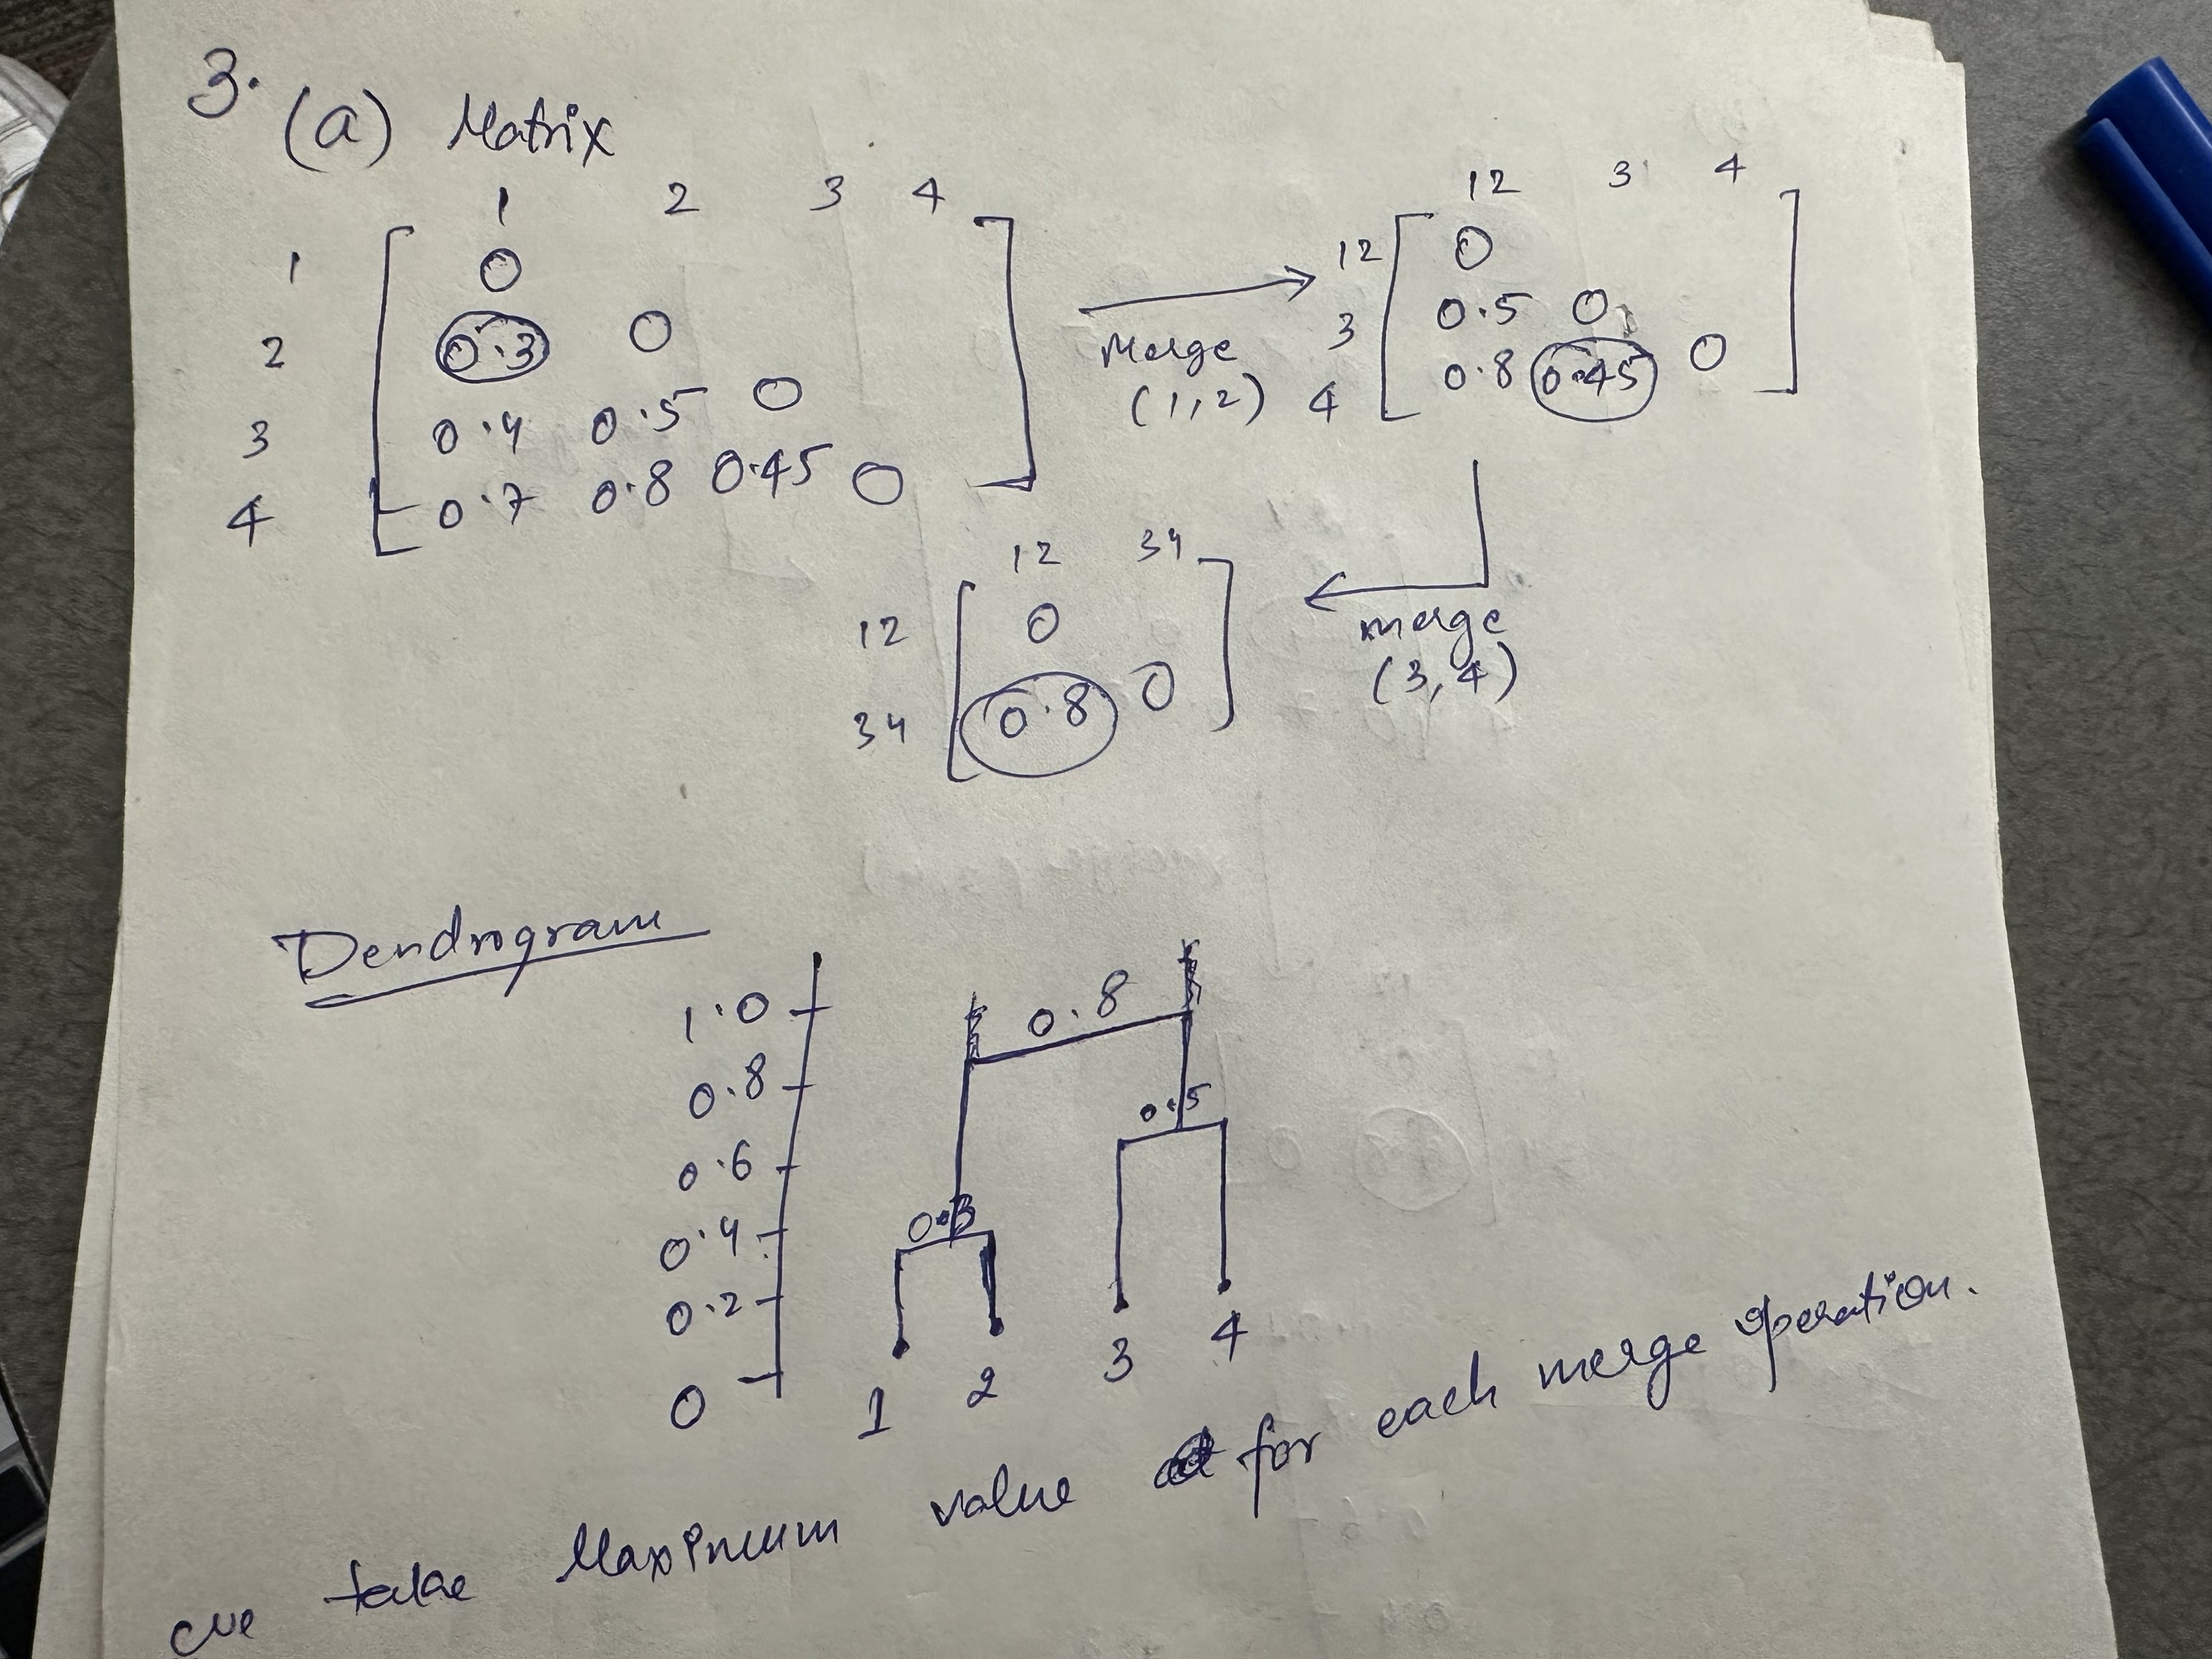

**3. (b) Repeat (a), this time using single linkage clustering.**


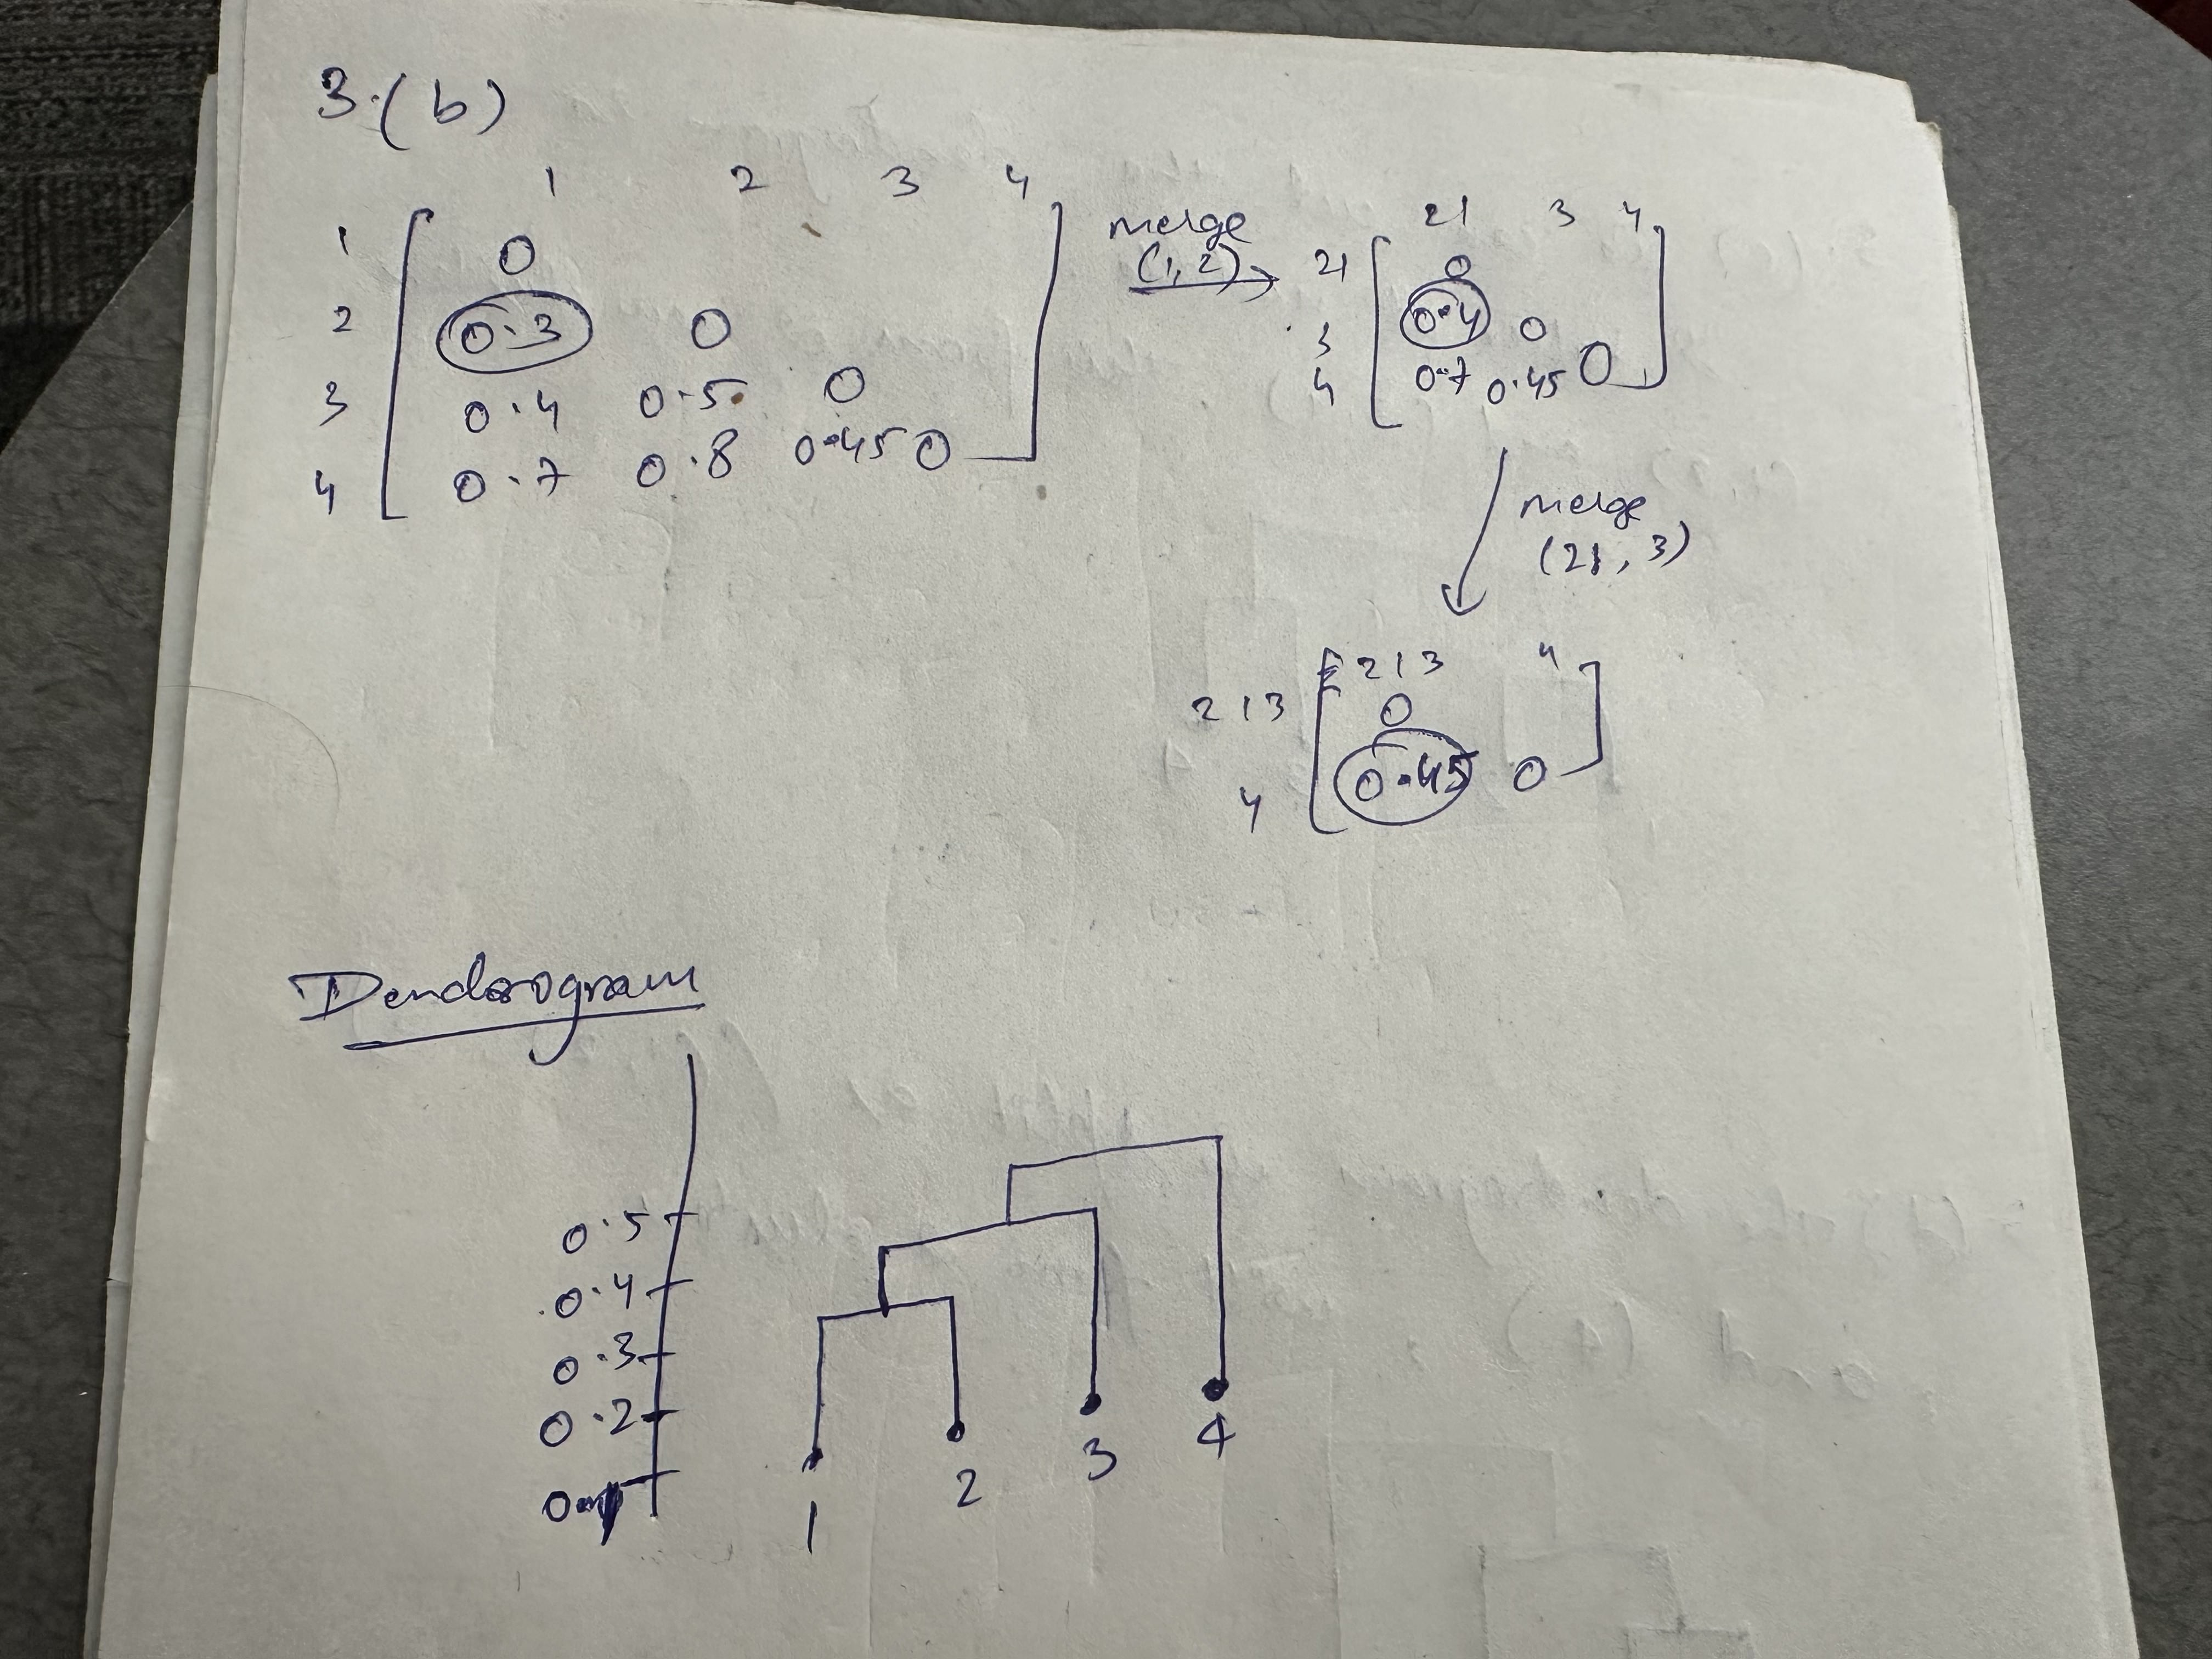

**3. (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?**

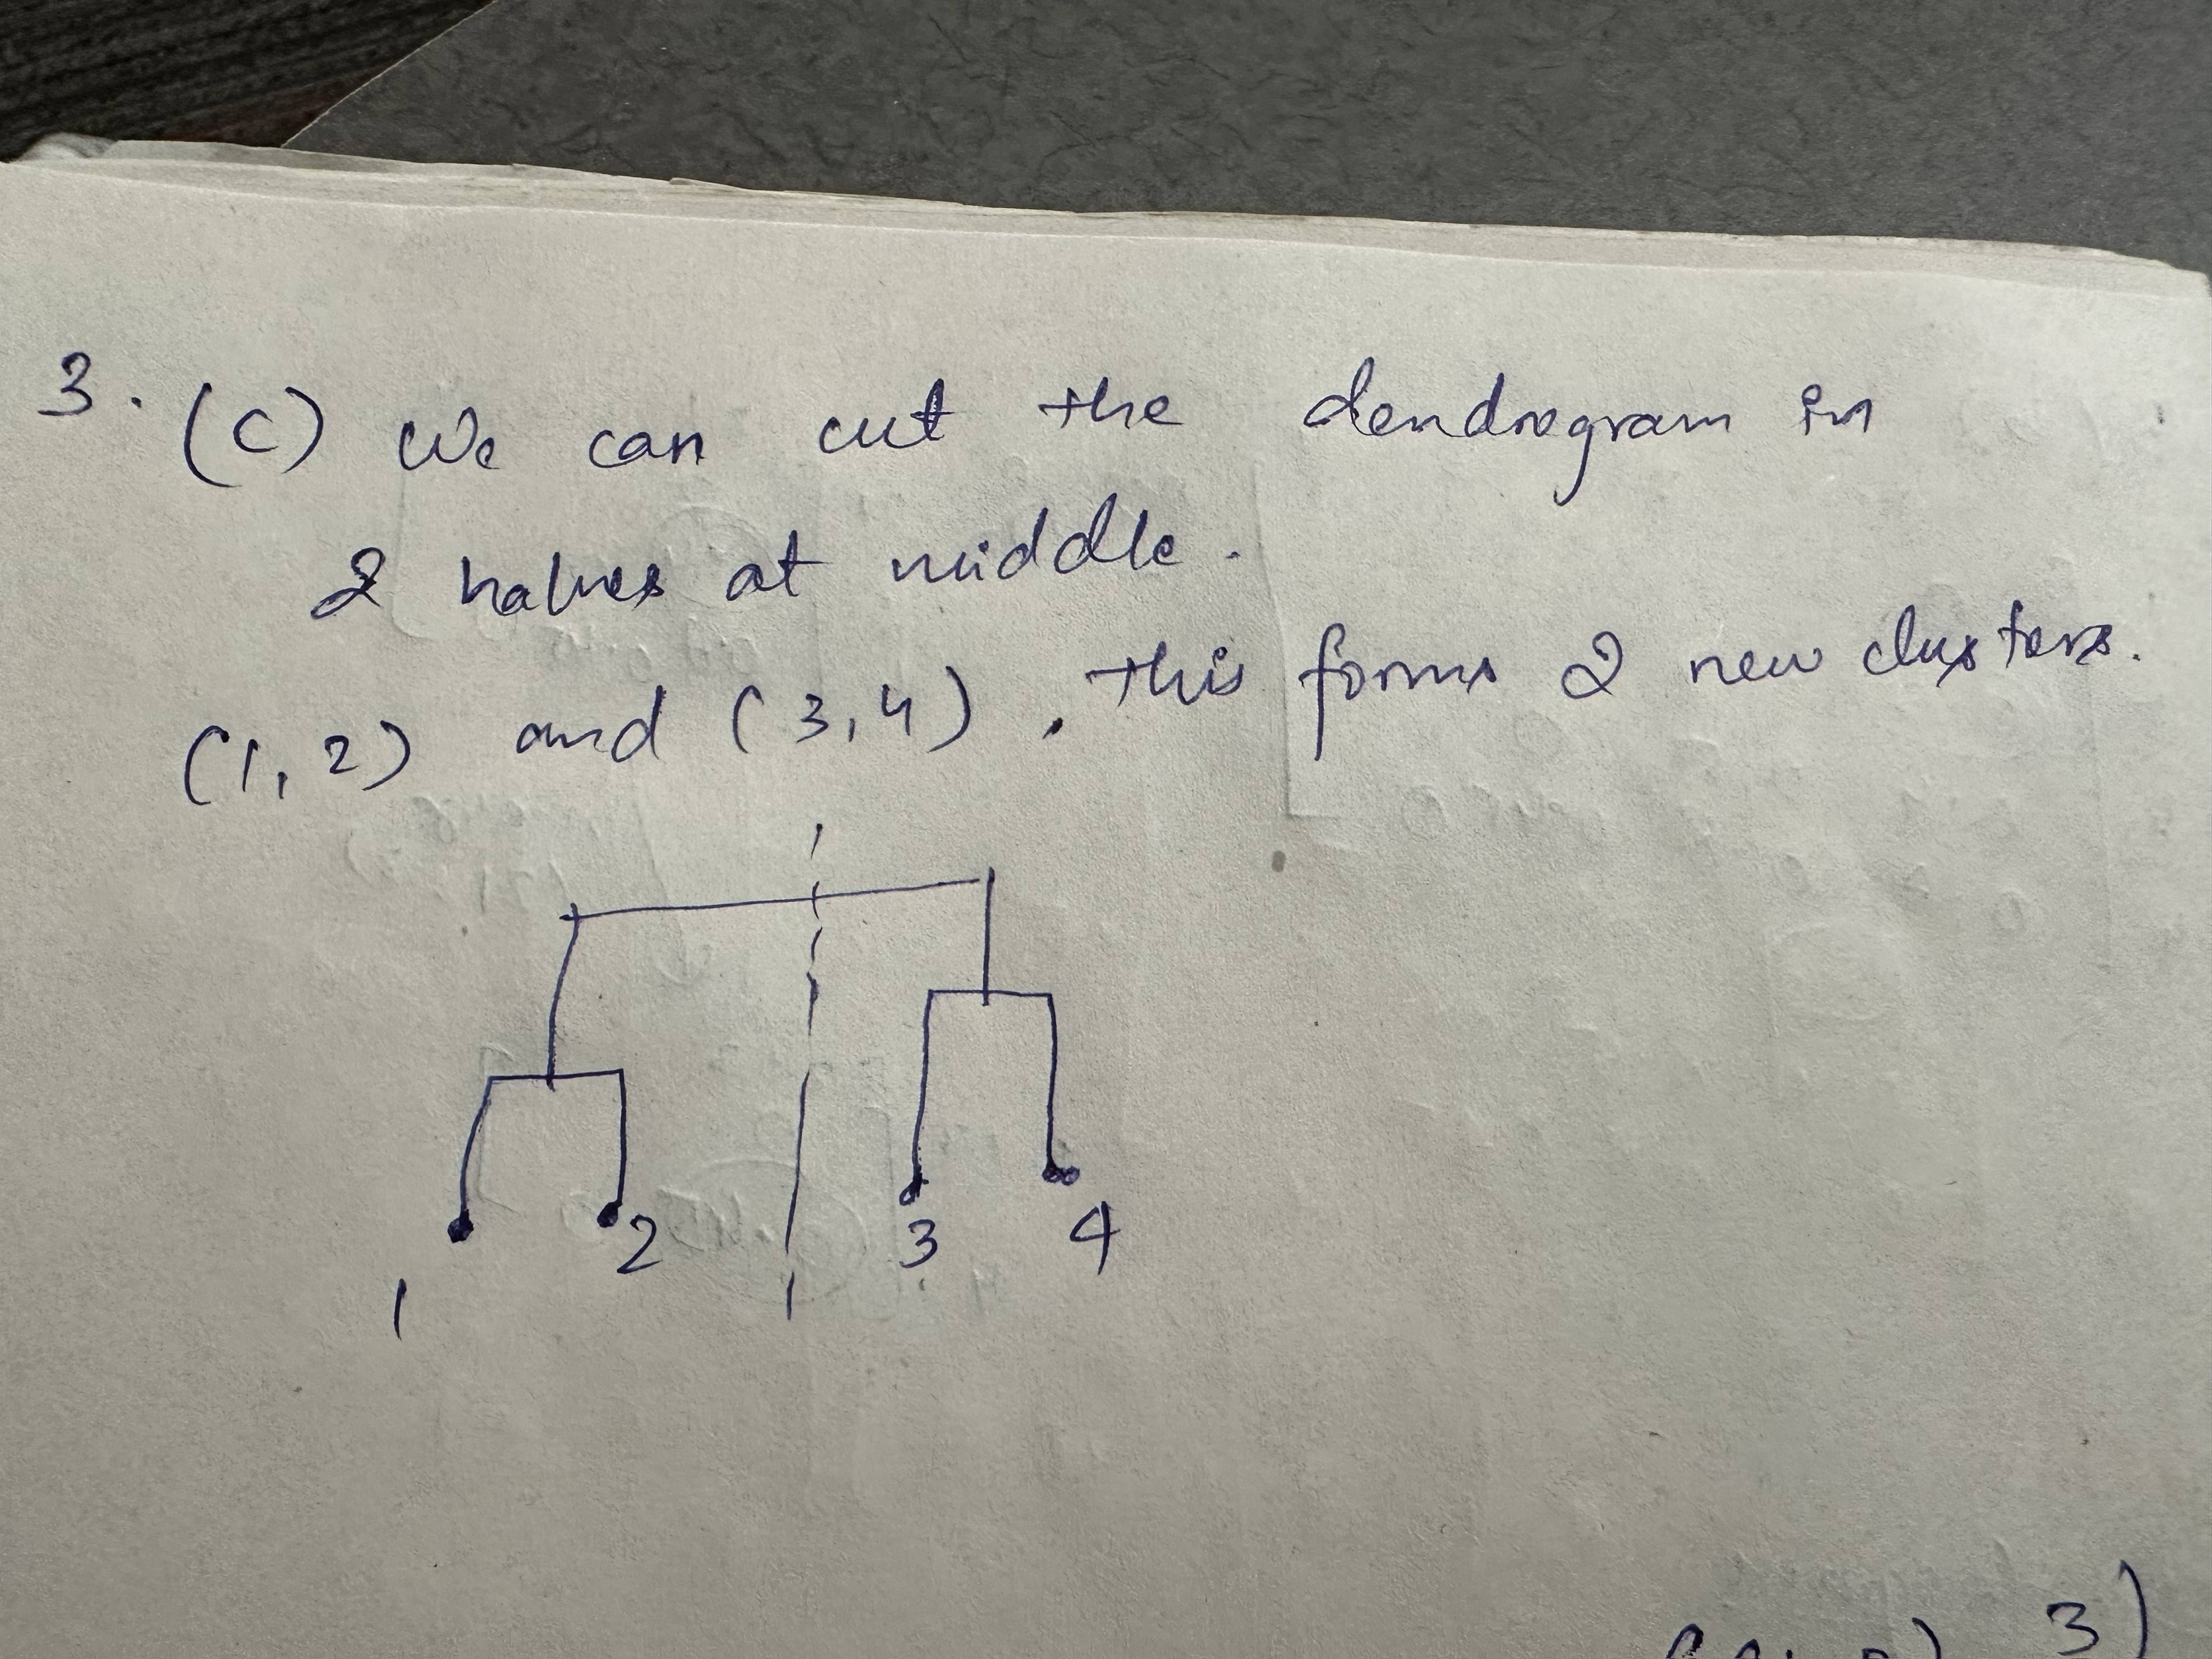

**3. (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?**

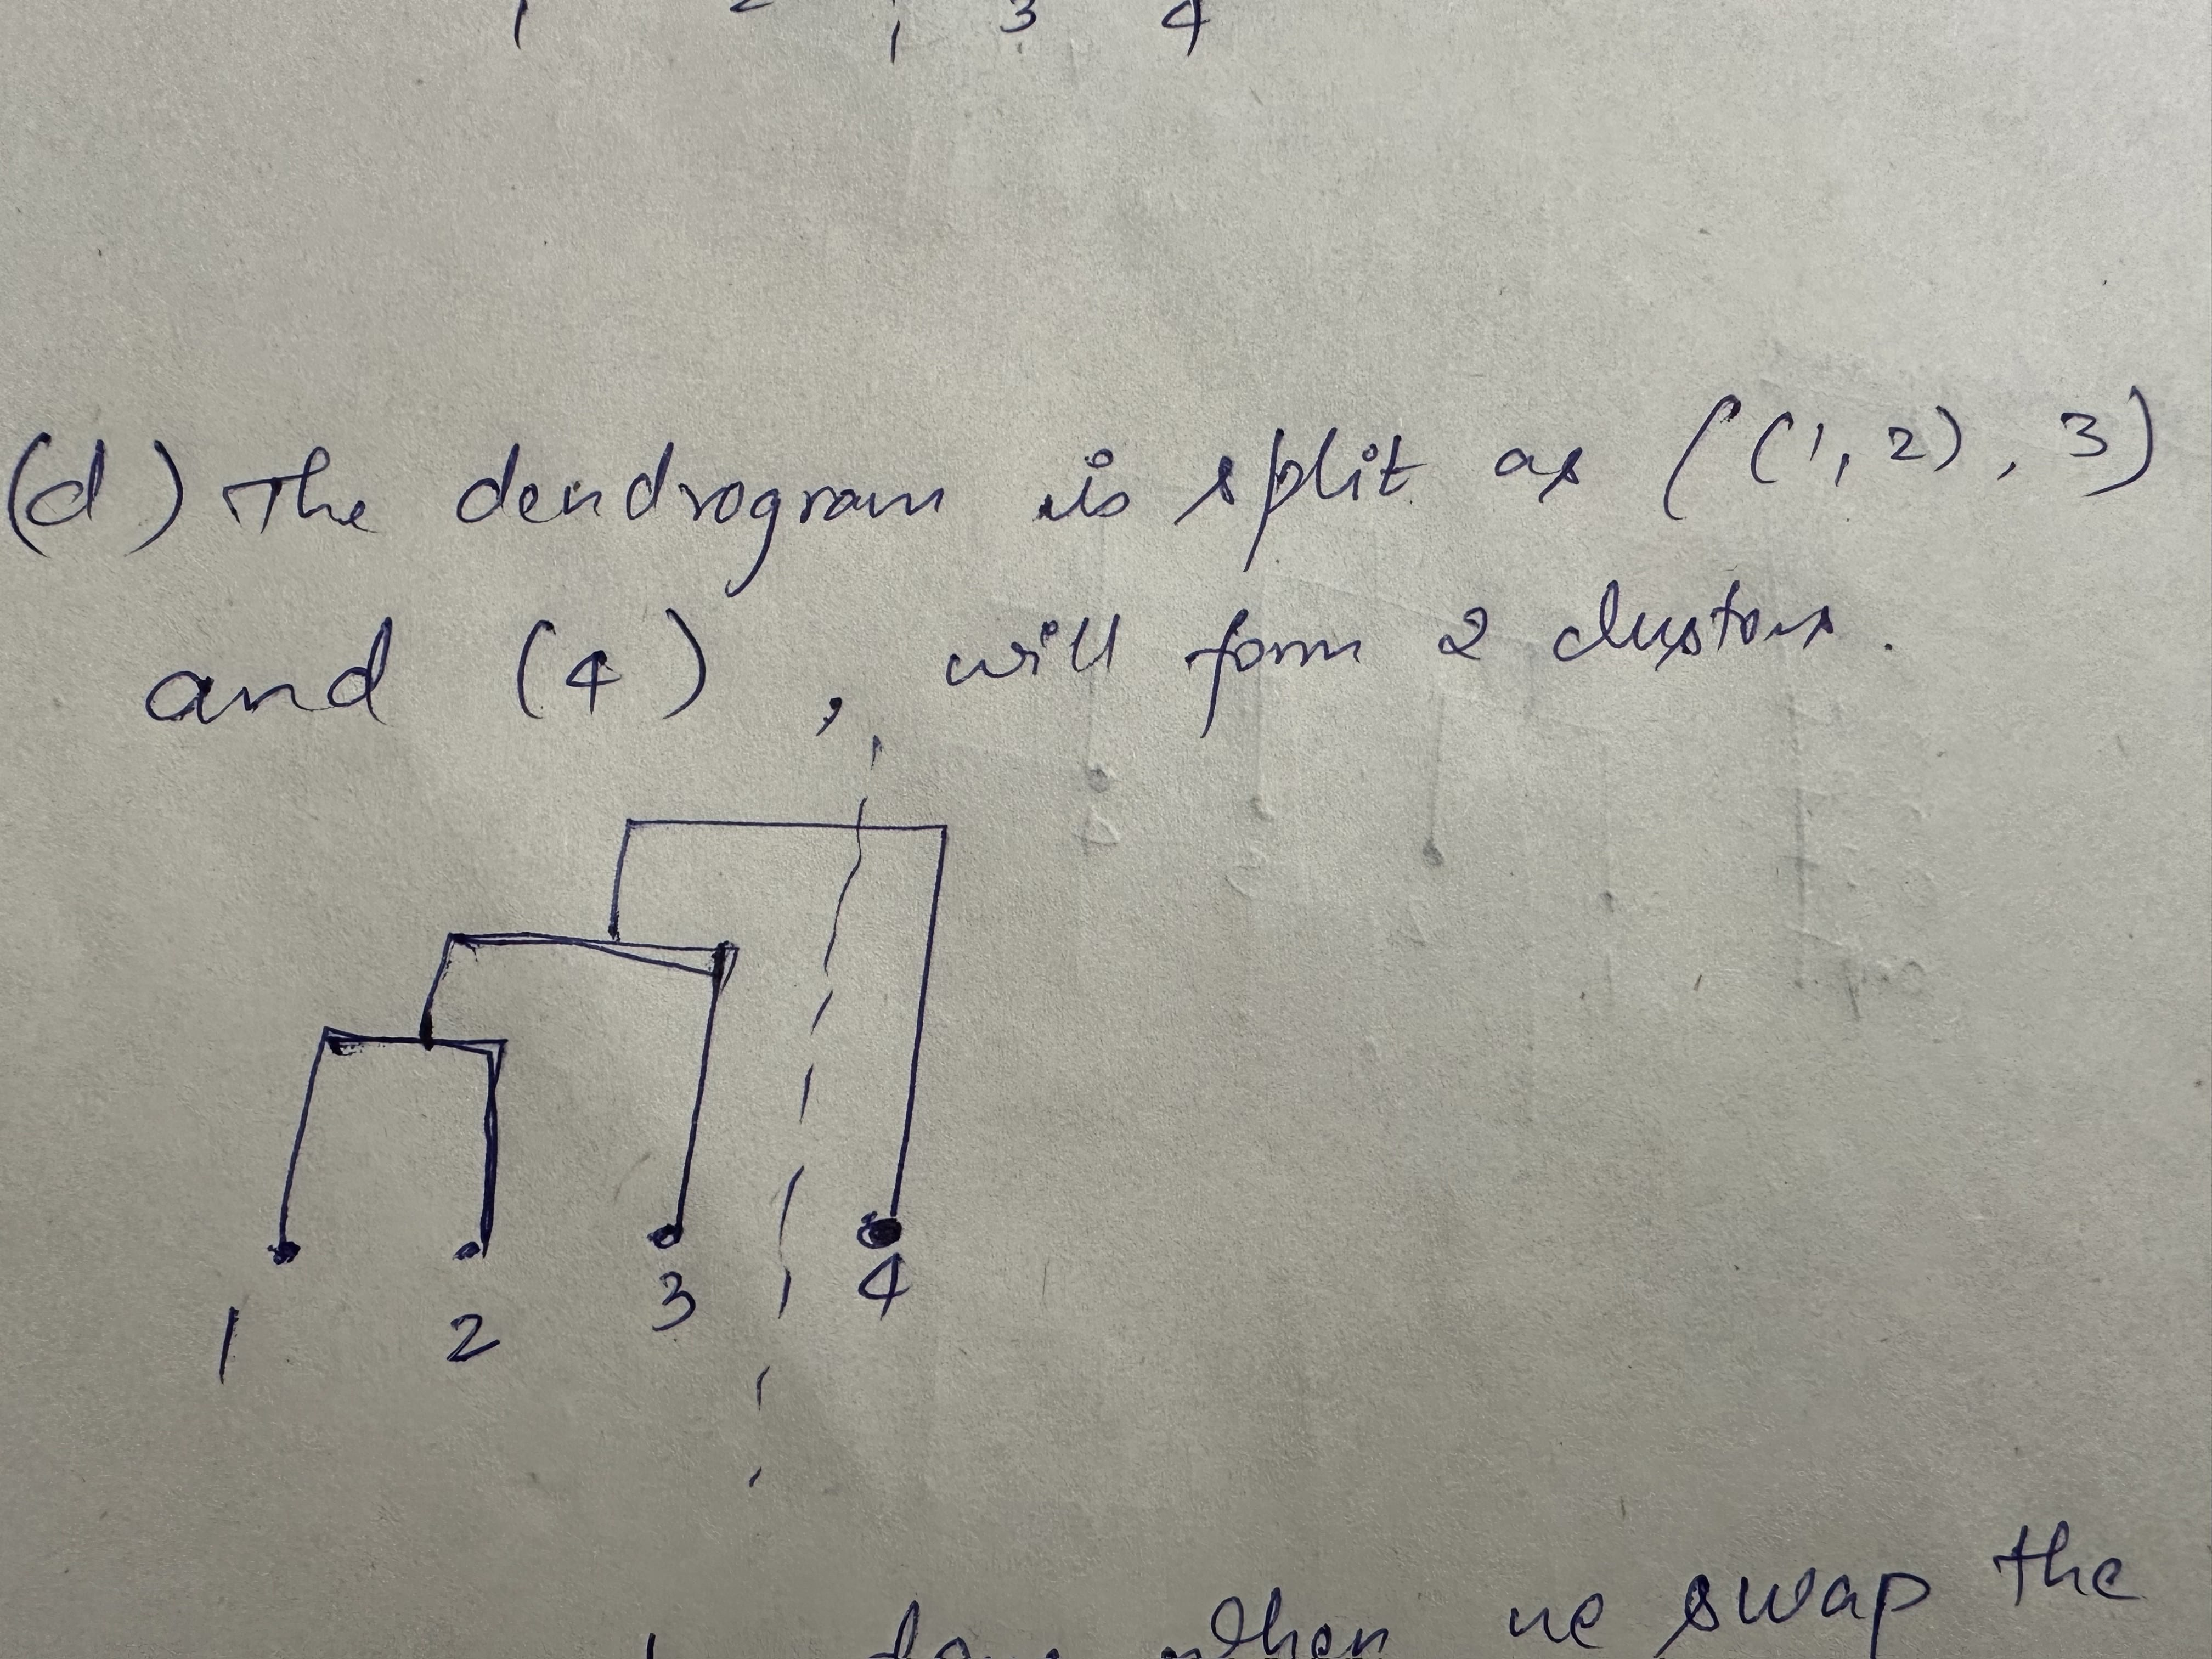

**3. (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.**

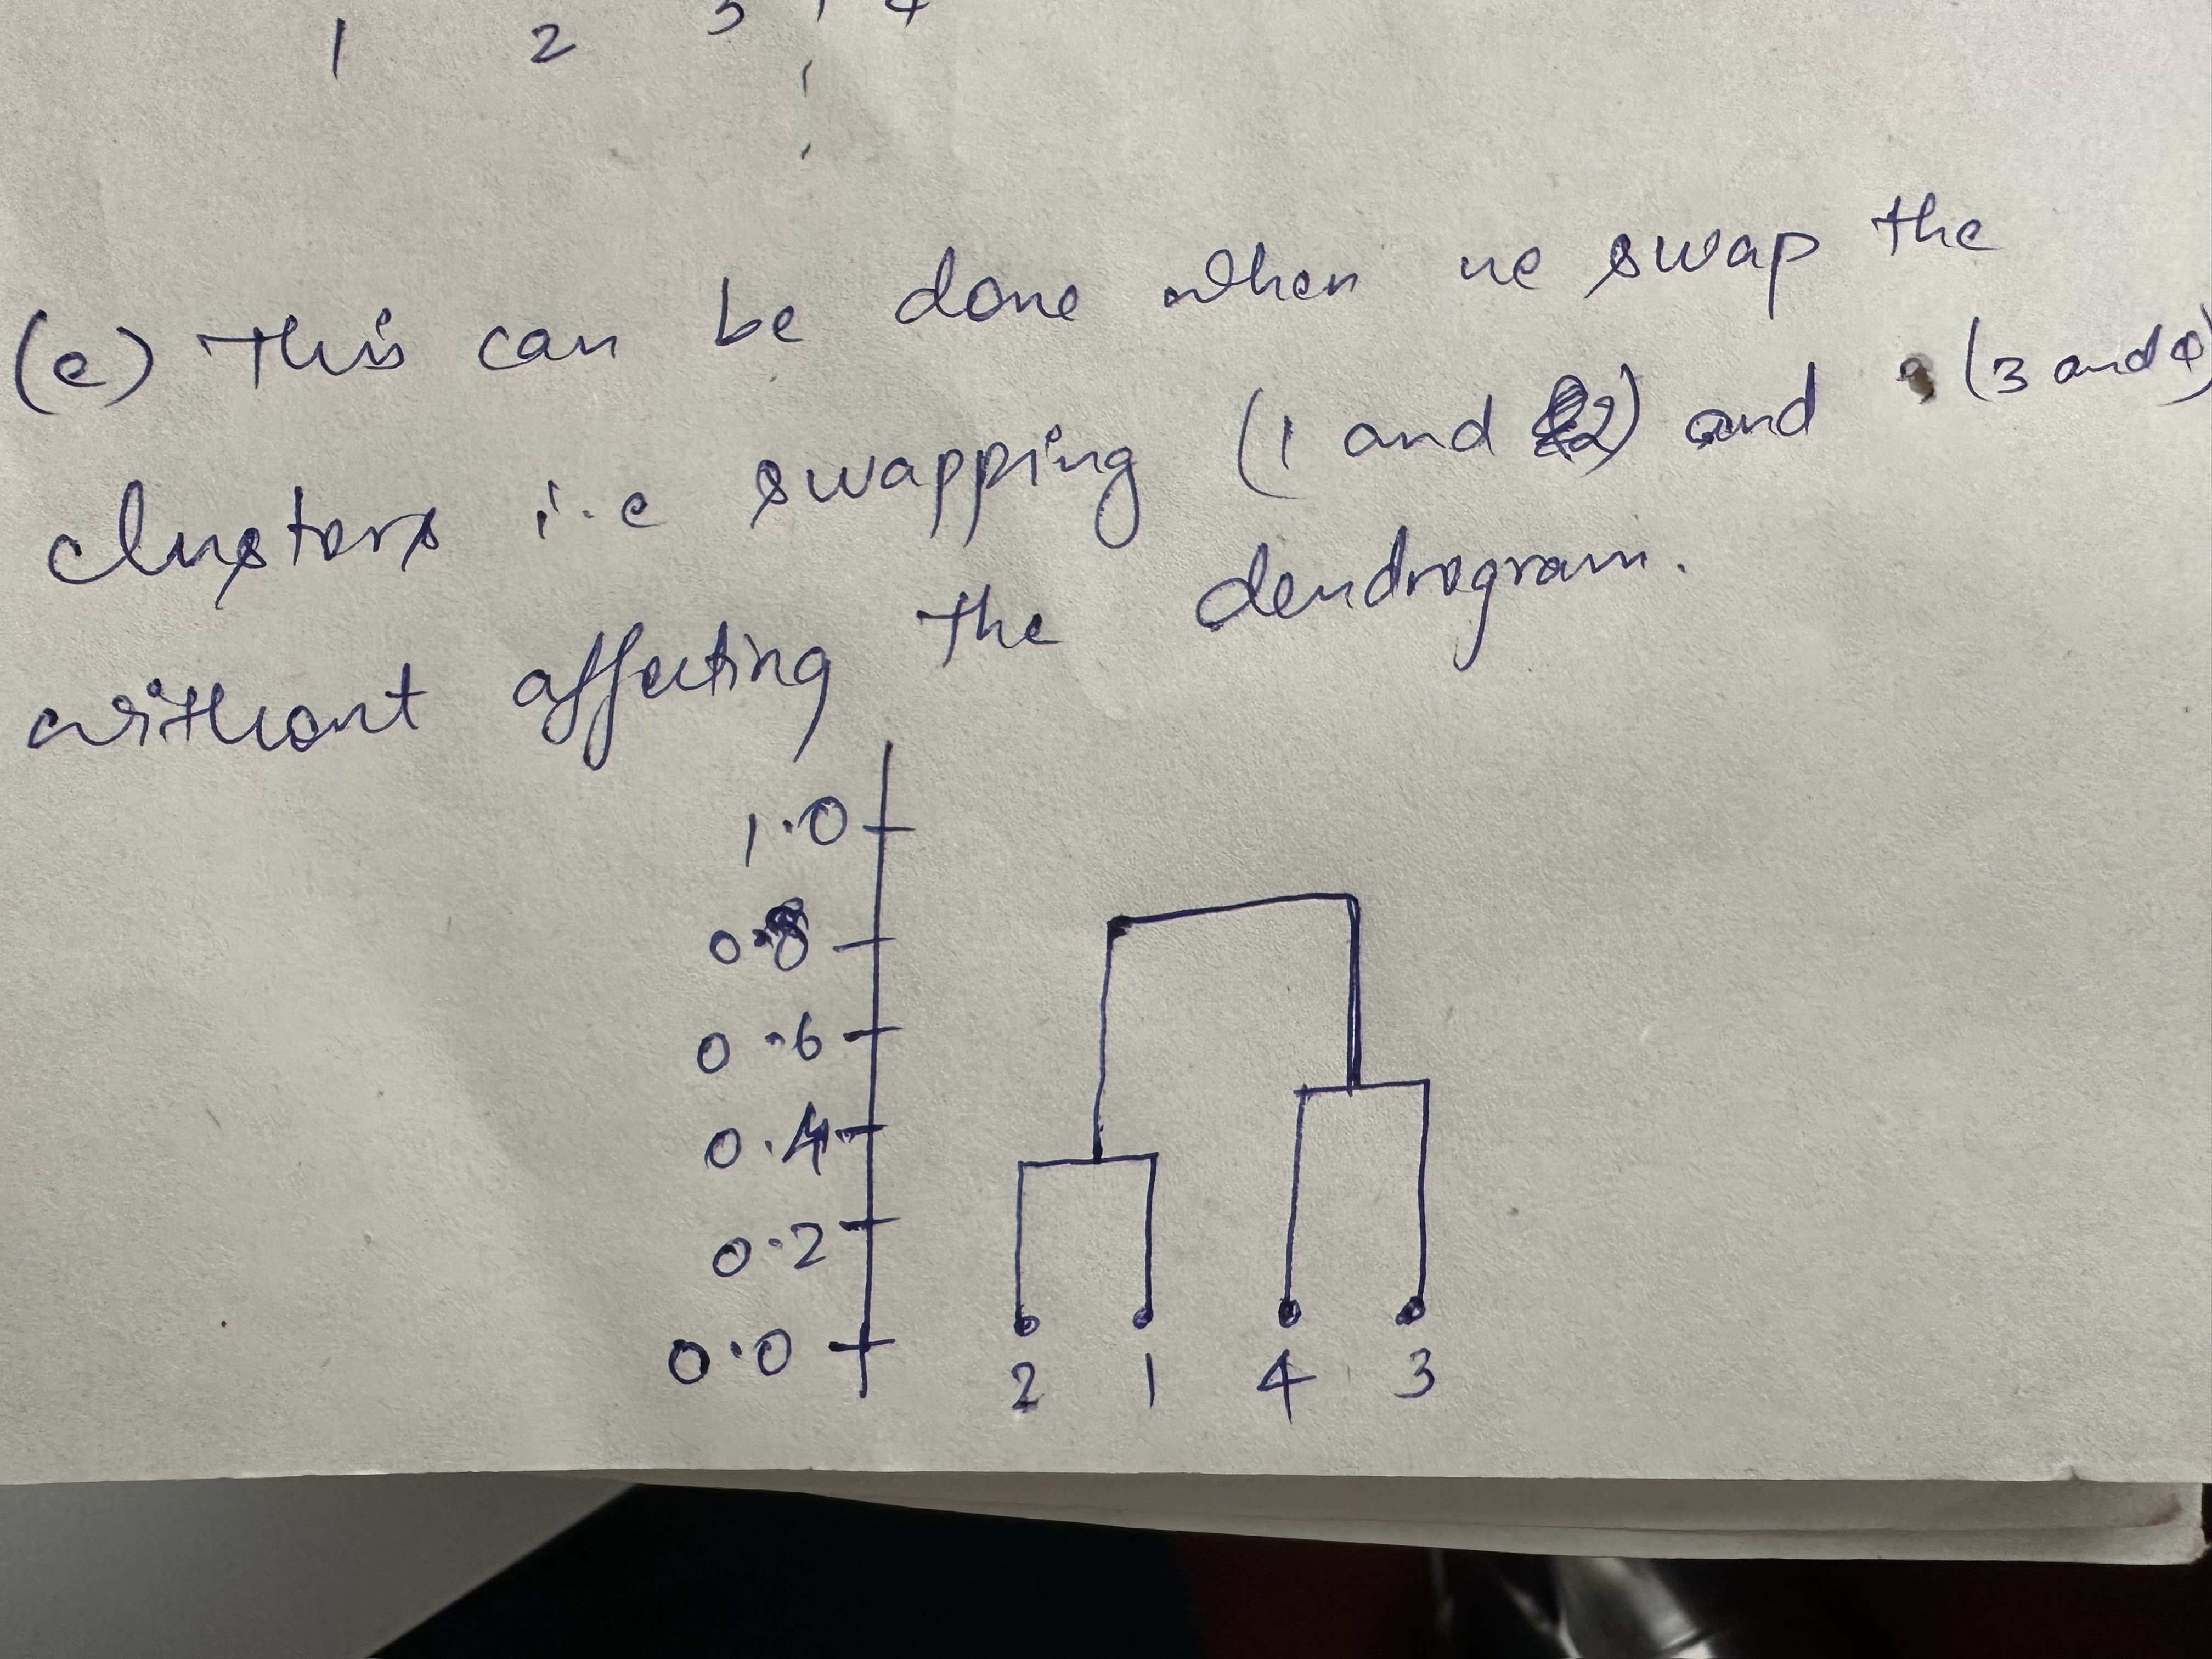